In [1]:
# !pip2 install pypolyagamma

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import importlib
import os
import sys

from base.experiment import *
from logistic.env_logistic import *
from logistic.agent_logistic import *
from utils import *

import numpy as np
import pandas as pd
import plotnine as gg

#import importlib
#importlib.reload(logistic.agent_logistic)
#reload(sys.modules['logistic.agent_logistic'])

In [2]:
#No bias for now.

def simple_compare(agents, num_articles, dim, var, n_steps, seed=0, verbosity=0):
    env = LogisticBandit(num_articles, dim, NormalDist(0,1,dim=dim), NormalDist(0,var,dim=dim), seed=seed)
    #DistributionWithConstant(
    experiment = ExperimentCompare(agents, env, n_steps,
                   seed=seed, verbosity=verbosity) #, rec_freq=1, unique_id='NULL')
    experiment.run_experiment()
    results = []
    results.append(experiment.results)
    df = pd.DataFrame(results[0])
    #https://stackoverflow.com/questions/39092067/pandas-dataframe-convert-column-type-to-string-or-categorical
    df['agent_id'] = df.agent_id.astype('category')
    print(gg.ggplot(df)
     + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    print(gg.ggplot(df)
     + gg.aes('t', 'time', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    return results, df

def hyperparameter_sweep(make_agent_from_hyperparameters, hyperparam_list, dim, var, n_steps, seed=0, verbosity=0):
    agents = [make_agent_from_hyperparameters(hyperparam) for hyperparam in hyperparam_list]
    results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=verbosity)

In [3]:
name = 'logistic'
num_articles = 10
dim = 20
var = 1.0/9
theta_mean = 0
theta_std = 1

n_steps = 500 #number of experiment steps
time_limit= 0.1

verbosity=1


In [4]:
make_sagald_agent = lambda hypers: SAGATS(num_articles, dim, [0]*dim, cov=None, 
                                          step_size=lambda t: hypers[0]/(1 + t * np.sqrt(dim*var)/dim),
                                          batch_size = hypers[1],
                                          time=time_limit,
                                          n_steps=9999,
                                          init_pt=None, verbosity=verbosity)

n_steps=100

In [5]:


#hyperparameter_sweep(make_sagald_agent, list_prod([[0.2,0.1,0.05], [32, 64, 128]]), dim, var, n_steps, seed=1, verbosity=1)

#hyperparameter_sweep(make_mala_agent, [[0.1/2**n] for n in range(10)], dim, var, n_steps, seed=1, verbosity=1)

In [6]:

#hyperparameter_sweep(make_sagald_agent, list_prod([[0.2], [1,100]]), dim, var, n_steps, seed=1, verbosity=1)

In [7]:

#hyperparameter_sweep(make_sagald_agent, list_prod([[0.2], [1,500]]), dim, var, 500, seed=1, verbosity=1)

precondition False
precondition proper
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521]
Experiment: Step 0
 Sample: array([-1.65072127, -0.89055558, -1.1191154 ,  1.9560789 , -0.3264995 ,
       -1.34267579,  1.11438298, -0.58652394, -1.23685338,  0.87583893,
        0.62336218, -0.43495668,  1.40754   ,  0.12910158,  1.6169496 ,
        0.50274088,  1.55880554,  0.1094027 , -1.2197444 ,  2.44936865])
 Steps taken: 0
 Sample: array([-0.54577417, -0.19883786, -0.7003985 , -0.20339445,  0.24266944,
        0.20183018,  0.66102029,  1.79215821, -0.12046457, -1.23312074,
       -1.18231813, -0.66575452, -1.67419581,  0.82502982, -0.49821356,
       -0.31098498, -0.00189148, -1.39662042, -0.86131636,  0.67471153])
 Steps taken: 0
Experiment: Step 1
 Sample: array([ 0.22946499,  0.82243114,  0.

 Sample: array([-1.00956057,  1.46724897,  0.90033647, -0.64306626, -0.08215446,
       -0.88398456,  0.51914426, -0.05681358, -0.42620481,  0.98469414,
        1.66511295,  0.82318676, -0.41785667, -0.69319229, -1.04451525,
       -0.12807439,  0.01879546, -1.4785478 , -0.72390759, -1.47607609])
 Steps taken: 173
Experiment: Step 13
 Sample: array([ 0.46962236,  2.17825482,  1.1443054 , -0.53648268,  0.31402225,
       -1.62833393,  0.31173979,  1.64949168, -0.88538268, -0.51821659,
        0.26986475, -1.65444287, -0.24689464, -0.33371378,  1.70632878,
       -1.12109164,  0.02909946, -0.95426624,  0.19437901,  0.63185304])
 Steps taken: 1257
 Sample: array([ 0.4406606 ,  1.0467536 ,  0.56630592, -1.88235202, -0.54605217,
       -0.26425437, -0.23350852, -0.12095093,  0.75209167,  1.34385827,
       -0.64676507,  0.67488382,  0.43583032, -1.22741502, -0.1517702 ,
       -1.07264271, -0.2525371 , -2.05663175,  0.12945477, -2.36816778])
 Steps taken: 151
Experiment: Step 14
 Sample: ar

 Sample: array([-0.06300244,  0.60252972, -0.07552096, -0.06141712, -0.35526342,
        0.52873576,  0.07496077, -0.91663541,  1.44570362,  0.85941039,
       -0.41651639, -0.37977509,  1.44324489, -0.94076514, -0.41950958,
       -0.28633497,  1.98395492,  0.02827988, -0.14819948, -0.38574252])
 Steps taken: 146
Experiment: Step 26
 Sample: array([ 0.3696781 ,  0.54001415, -1.02339532,  0.8893071 ,  1.63863927,
       -0.96344403,  0.9576312 , -0.37678244,  0.05750713, -0.79937601,
       -0.29840606, -0.81521474, -1.42161261,  0.18796131,  1.06646433,
        0.95974786,  0.07222861, -0.43891875, -0.43527497,  1.85133255])
 Steps taken: 1154
 Sample: array([ 0.89041888,  0.59087561,  0.30123935, -0.32181455, -0.64645796,
        0.28018483,  0.36229399,  0.30325209,  0.96065096,  1.16452903,
       -0.10746204, -0.77285181,  1.29605195, -0.29222241,  0.08354736,
       -0.86116976,  0.87003164, -0.70057433, -0.40898254, -0.05645487])
 Steps taken: 139
Experiment: Step 27
 Sample: ar

 Sample: array([ 0.58905657,  0.74522951, -0.90241456,  0.17141979, -0.68891829,
       -1.37261285,  1.15832597, -1.12354869, -0.41475872,  1.10168624,
        1.91778056, -1.2385098 ,  0.63441667,  0.59131128, -0.25334161,
       -1.26610041, -1.51440891, -0.52270757, -0.18190613, -0.381056  ])
 Steps taken: 125
Experiment: Step 39
 Sample: array([ 2.1323505 ,  1.02297399, -0.12951706,  1.34252423, -0.68155282,
       -0.4999354 ,  2.24903976,  0.61856823, -0.24192182,  1.07994616,
       -0.48473918, -1.31563273,  1.62819525,  0.2004236 ,  1.48841625,
       -0.72334308, -1.37004534, -1.7895448 ,  0.18173365,  1.70717268])
 Steps taken: 780
 Sample: array([ 0.68076019,  1.84403949, -0.26152581, -0.11421037, -1.19018048,
       -1.19342808,  1.42889818, -1.8036884 , -0.27431438,  0.82713528,
        1.10068179, -0.86696211, -0.06670562,  0.21159924, -0.14301557,
       -0.56628041, -1.3121689 , -0.91020391, -0.33060585, -0.09046783])
 Steps taken: 119
Experiment: Step 40
 Sample: arr

 Sample: array([ 0.98102403,  0.4974892 , -1.13282513,  1.00781166,  1.27261606,
       -0.36503669,  0.27804439, -1.26810618,  0.72104961,  0.94471128,
       -0.04787008, -1.48023299, -0.86044911,  0.29378998,  1.28372335,
       -0.75246116, -0.93539939, -0.05692277, -0.34408373,  0.86868955])
 Steps taken: 138
Experiment: Step 52
 Sample: array([ 1.3290048 ,  0.02517757, -0.59605059,  0.97467546, -0.64831281,
       -1.21357863,  1.13067915, -0.33958585, -0.52205017, -1.32888478,
        1.71044735,  0.42071733, -0.6626699 ,  0.35370242,  1.52105887,
       -2.12369766, -0.26242486, -1.27550427,  0.44149376,  1.74789079])
 Steps taken: 884
 Sample: array([ 0.89626258,  1.03619125, -0.90970501,  1.01141337,  0.75895939,
        0.20273502,  0.65458683, -1.42257581,  0.14392348,  1.13430114,
       -0.31354772, -1.41649801, -0.43686051,  0.49081013,  0.33806493,
       -1.25652628, -1.33230053,  0.11094094, -0.38424469, -0.48101074])
 Steps taken: 142
Experiment: Step 53
 Sample: arr

 Sample: array([ 1.10427666, -1.11752233, -0.42049585,  1.56831828,  1.11173543,
       -0.15306162,  1.34952839, -2.41363842, -0.3306131 ,  1.17717731,
        1.11916744, -2.01319544, -0.51267552, -0.5311536 ,  1.90058958,
       -0.85091915, -1.36805059, -0.40832343,  0.60745062,  0.58622849])
 Steps taken: 145
Experiment: Step 65
 Sample: array([ 2.00568081, -0.94734925, -0.73066774,  1.05889106, -1.08264134,
       -0.28033941,  0.74690353, -0.72267327, -0.04980591, -0.73551952,
        1.03890431, -1.15928987, -0.7269278 , -0.45867776, -0.03531002,
       -1.08497942,  0.11204853, -2.01331037,  0.38774365,  2.56822469])
 Steps taken: 885
 Sample: array([ 1.3919199 , -1.57922966, -0.28887383,  1.84388651,  0.72679618,
       -0.12197295,  1.360861  , -2.33983982, -0.64794221,  0.37309668,
        0.38478241, -2.07302271, -0.03629099, -0.65324524,  1.85358068,
       -0.50770838, -1.61361483,  0.16856852,  0.38139776,  0.51214742])
 Steps taken: 140
Experiment: Step 66
 Sample: arr

 Sample: array([ 1.631861  ,  0.61061917, -1.83809341, -0.41706707,  1.75353747,
       -0.49568693,  0.57051364, -1.02128428,  0.37187662,  1.49593348,
        1.44925449, -1.25083723,  0.53306552,  0.97183376,  0.22831574,
       -1.0883865 , -0.39912883, -0.75101172, -1.01654896,  0.2586881 ])
 Steps taken: 138
Experiment: Step 78
 Sample: array([ 0.79206068, -0.13309995,  0.63059314,  0.80859508, -0.69277407,
       -0.92757836,  1.12411277, -1.40731939, -0.08833428, -0.56134651,
       -0.10708956, -1.9575411 ,  0.66107046,  0.96779941,  0.07355386,
       -2.03985642, -1.42462429,  0.04320201,  0.04720192,  1.50620961])
 Steps taken: 884
 Sample: array([ 1.55761591,  0.01573056, -2.13154341, -0.7387973 ,  1.78120331,
       -1.36813452,  0.61081713, -0.86039997,  0.13748155,  1.71330291,
        1.24324488, -1.56447743,  0.14853702,  0.78707894,  0.06833048,
       -0.75070181, -0.12887318, -0.95471879, -0.12296946, -0.12508647])
 Steps taken: 139
Experiment: Step 79
 Sample: arr

 Sample: array([ 2.17506831,  1.35726054, -1.90716027, -1.20339591,  0.45894301,
       -1.852753  ,  1.35775886, -1.10536935, -0.04229755, -0.3988698 ,
        1.31486875, -1.02934556,  0.4065838 , -0.13195548,  0.62234948,
       -0.3992644 , -0.96211471, -0.57337669, -0.90957524,  0.67174765])
 Steps taken: 130
Experiment: Step 91
 Sample: array([ 2.14772193,  0.56467489, -1.30478197, -0.38205726,  1.04774773,
       -0.80842349,  2.27539442,  0.54897875, -0.76816851,  0.64814689,
        0.43552928, -1.63273667,  1.6229282 , -0.28083395,  1.80973797,
       -1.17722457,  0.10966985, -1.45304981, -0.48877228,  0.64583796])
 Steps taken: 851
 Sample: array([ 2.10767983,  1.60359866, -2.27690165, -1.57826596,  0.64965408,
       -1.67808602,  1.22384552, -0.61153497,  0.04905143, -0.683223  ,
        1.74472206, -0.83454471,  0.68056115, -0.80271662, -0.13693257,
       -0.65317454, -0.5237292 , -0.7091567 , -1.07724254,  0.78506433])
 Steps taken: 133
Experiment: Step 92
 Sample: arr

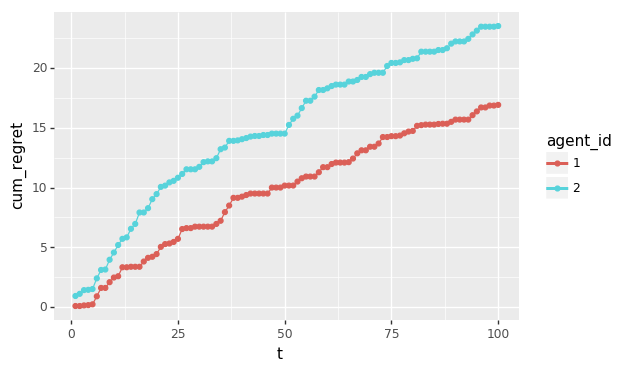

<ggplot: (8784768923645)>


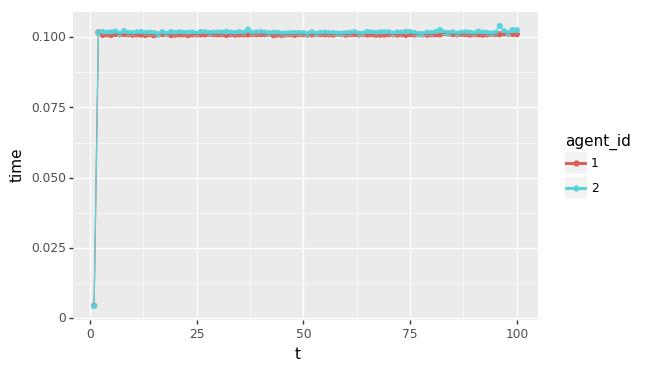

<ggplot: (8784768984225)>


([     action_id agent_id  cum_optimal  cum_regret  instant_regret    t  \
  0            1        1     0.999721    0.088187        0.088187    1   
  1            2        2     0.999721    0.927229        0.927229    1   
  2            3        1     1.875695    0.088187        0.000000    2   
  3            4        2     1.875695    1.108367        0.181138    2   
  4            5        1     2.821554    0.139044        0.050858    3   
  5            6        2     2.821554    1.418658        0.310291    3   
  6            7        1     3.797700    0.163781        0.024737    4   
  7            8        2     3.797700    1.443394        0.024737    4   
  8            9        1     4.657436    0.229698        0.065917    5   
  9           10        2     4.657436    1.509311        0.065917    5   
  10          11        1     5.580699    0.899063        0.669365    6   
  11          12        2     5.580699    2.404046        0.894735    6   
  12          13        1

In [13]:
make_prec_sagald_agent = lambda hypers: SAGATS(num_articles, dim, [0]*dim, cov=None, 
                                          step_size=lambda t: hypers[0],
                                          batch_size = hypers[1],
                                          time=0.1,
                                          n_steps=9999,
                                          precondition='proper',
                                          init_pt=None, verbosity=verbosity)

n_steps=100
agents = [make_sagald_agent([0.02, 32]), make_prec_sagald_agent([0.02,32])]
simple_compare(agents, num_articles, dim, var, n_steps, seed=1, verbosity=1)

In [9]:
print(agents[1].H)

[[ 4.61510193e+00  6.06882848e-01 -3.44389108e-01  5.14445958e-03
   2.77129571e-01 -2.84568020e-01 -1.36477909e-01  1.43778984e-01
  -1.55690449e-01  1.66175696e-01  4.18065008e-01  3.23908614e-01
   2.03932102e-01 -2.65366163e-01  5.46601120e-01  2.72009432e-01
   1.22479928e-01 -7.57553150e-02 -2.60028765e-01  2.95064258e-01]
 [ 6.06882848e-01  5.06780006e+00 -2.37330273e-01 -5.74605307e-01
  -6.62633994e-01 -1.21483781e-01 -4.79759451e-01 -2.66510226e-01
   4.92733810e-01 -1.35245115e-03 -7.87052270e-02 -3.55636287e-01
  -5.16756587e-01  6.59461954e-01  2.04724860e-01 -1.31472504e-01
  -2.09078383e-01  1.06151894e+00 -6.19183782e-01  2.16046298e-01]
 [-3.44389108e-01 -2.37330273e-01  4.53051556e+00 -6.79787703e-01
  -4.88021010e-01  2.58360010e-01 -1.03528890e-01  2.42673620e-01
   4.14764795e-01 -4.17894304e-01 -2.11414150e-01  3.88700923e-01
   1.59756725e-01  1.38866920e-01  1.93273336e-01 -9.87745750e-02
   4.43142799e-02 -2.94536003e-01  5.15701694e-01  1.74859533e-01]
 [ 5.14

In [11]:
np.linalg.eig(agents[1].H)

(array([31.05850706, 54.77958049, 54.12696615, 35.1207439 , 35.84744402,
        52.41745757, 51.12797509, 37.12238069, 37.85905635, 38.67198444,
        49.43534503, 49.11471356, 40.25838132, 40.54935788, 42.30193534,
        43.19550699, 47.49541805, 44.98225598, 46.20740464, 46.36219031]),
 array([[-5.28925322e-02, -1.17412322e-01, -6.34376662e-02,
         -3.89283083e-01,  2.78678216e-01,  4.30793661e-03,
          3.37838514e-01, -5.31965183e-01,  3.18444822e-02,
          4.49649867e-02, -7.79616640e-02,  1.77866051e-01,
         -1.97701586e-01, -1.51166450e-01,  2.23258816e-01,
         -1.02659227e-01,  3.48472201e-01, -2.17662366e-01,
          1.29171562e-01, -6.69564836e-02],
        [ 3.14405106e-01,  4.01832567e-01, -1.78851837e-01,
         -1.17157861e-01,  3.58945742e-02,  1.24341404e-01,
         -3.77467600e-02,  7.58776919e-02, -7.13078603e-02,
          2.48238126e-02, -3.43384017e-01, -1.69707604e-01,
         -1.96718649e-01,  2.99202475e-01,  3.24979636e-01,
  